## 회귀분석 (Regression)


- 독립변수(X)와 종속변수(Y)의 관계식에서
  독립변수가 한 단위 증가할 때 종속변수가 얼마나 영향을 받는지 분석
  

[예] 연속형변수와 연속형 변수를 비교할 때


- 나이(X)가 많을 수록 소득(Y)가 높은지 분석
- 광고지불비(X)에 따라 판매량이 영향을 받는지 분석
- 가계 수입과 사교육비 지출 사이에 관계가 있는지 분석



[참고그림] '모두의 딥러닝' 교재에서

<img src='./imgs/regression1.png' width='500'>
<img src='./imgs/regression2.png' width='500'>
<img src='./imgs/regression3.png' width='500'>

** 회귀분석 종류

1) 단순회귀 분석 : 독립변수가 1개
        
        ` 광고지불비(X)를 이용하여 상품 매출액(Y) 예측할 때
        
2) 다중회귀 분석 : 독립변수가 2개 이상
       
       ` 어린이 연령(X1)과 하루 평균 학습시간(X2)를 이용하여 그 어린이의 성적(Y)을 예측하고자 할 때



In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from scipy import stats

# 한글 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### 단순회귀분석 ( 선형회귀분석 )

- 독립변수가 1개인 경우

- 전기생산량(독립변수)과 전기소비량(종속변수)의 영향


    - 귀무가설 : 전기생산량과 전기소비량 간에 상관관계가 없다
    - 대립가설 : 전기생산량과 전기소비량 간에 상관관계가 있다

In [2]:
# 월별 전기생산금액
x= [3.52, 2.51, 3.91, 4.07, 3.98, 4.29, 4.81, 3.73, 4.61, 3.39, 3.20]

# 월별 전기 사용량
y= [2.48, 2.27, 2.47, 2.37, 3.09, 3.18, 3.88, 3.03, 3.55, 2.99, 2.88]


In [3]:
##### 단순회귀분석

result = stats.linregress(x, y)
result


LinregressResult(slope=0.5546831443969521, intercept=0.8074740247672794, rvalue=0.7200942961345399, pvalue=0.012451312531534768, stderr=0.17816251936092412, intercept_stderr=0.6896465034280101)

- 기울기(slope)
- 절편(intercept)
- 상관계수(rvalue) :상관관계의 정도를 파악하는 값 ( -1에서 1 )
                    - 1에 근접하면 양의 상관관계
                    - -1에 근접하면 음의 상관관계
                    - 0에 근접하면 상관관계가 없다
- pvalue : 예측 불확실성의 정도를 나타내는 값
- 에러의 표준편차(stderr)


* 상관분석 : 두 변수 간에 선형적 관계가 있는지 분석
* 상관계수 : 상관관계의 정도를 파악하는 값 ( -1에서 1 )
                    - 1에 근접하면 양의 상관관계
                    - -1에 근접하면 음의 상관관계
                    - 0에 근접하면 상관관계가 없다
                    
1) pvalue가 0.05보다 작으므로 통계적으로 유의미하기에
귀무가설을 기각하고 대립가설을 채택하여
전기생랸량과 소비생산량 간에 상관관계가 있다 

2) rvalue(상관계수)가 1에 가까우므로 양의 상관관계가 있다고 볼 수 있다 

설명력 :  0.7200942961345399
통계적으로 유의미한 데이터임


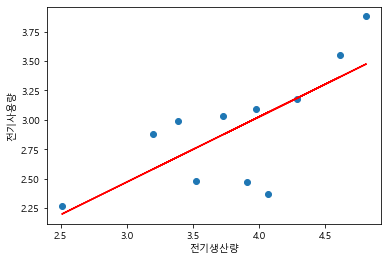

In [8]:
##### 선형 회귀 분석값 얻어오기
slope,intercept, rvalue, pvalue, stderr =  stats.linregress(x, y)
# slope : 기울기, intercept : 절편

print('설명력 : ', rvalue)

if pvalue < 0.05:
    print('통계적으로 유의미한 데이터임')
else:
    print('통계적으로 유의미하지 않은 데이터임')

    
##### 산점도 그리기
plt.scatter(x, y)
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')

##### 회귀선 그리기
x1 = np.array(x)
y1 = x1 * slope + intercept
plt.plot(x1, y1, c='red')

In [9]:
# 예측
# 만일 전기 생산량이 5 라면 전기 사용량은 얼마일까요?
5 * slope + intercept
# 예측) 3.5808897467520397

3.5808897467520397

### 회귀분석 예제 - 단순회귀분석(선형회귀분석)

#### 오존 데이터셋에서 온도에 따른 오존량 예측

- 독립변수 : 온도(수치형),   종속변수 : 오존량(수치형)
- 독립변수가 하나이기에 단순회귀분석(선형회귀분석) 적용


- 귀무가설 : 온도가 오존량에 영향을 미치지 않는다
- 대립가설 : 온도가 오존량에 영향을 미친다


In [10]:
df = pd.read_csv('../data/ozone/ozone.csv')
df.head()
df.tail()


,Ozone,Solar.R,Wind,Temp,Month,Day
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29
152,20.0,223.0,11.5,68,9,30


----------------------------------------------
[ * 작업단계 *]

1.  결측치 행 제거

2. 온도(Temp) 데이타 X와 오존(Ozone) 데이타 Y를 추출

3. 회귀분석 결과 출력

[ *  회귀 분석의 결과에 대한 분석 * ]

In [14]:
new = df.dropna()
new

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
147,14.0,20.0,16.6,63,9,25
148,30.0,193.0,6.9,70,9,26
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [17]:
new[['Temp', 'Ozone']]

,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
6,65,23.0
...,...,...
147,63,14.0
148,70,30.0
150,75,14.0
151,76,18.0


In [18]:
result = stats.linregress(new['Temp'], new['Ozone'])
result

LinregressResult(slope=2.439109905529362, intercept=-147.64607238059494, rvalue=0.6985414096486389, pvalue=1.552677229392932e-17, stderr=0.23931937849409174, intercept_stderr=18.755251765306646)

In [19]:
slope,intercept, rvalue, pvalue, stderr =  result

In [20]:
print('설명력 : ', rvalue)

설명력 :  0.6985414096486389


In [21]:
if pvalue < 0.05:
    print('통계적으로 유의미한 데이터임')
else:
    print('통계적으로 유의미하지 않은 데이터임')

통계적으로 유의미한 데이터임


In [24]:
# 김승철
if pvalue <= 0.05 :
    if rvalue > 0.3 :
        print('상관관계가 조금 있다')
    elif rvalue > 0.5 :
        print('상관관계가 어느정도 있다')
    elif rvalue > 0.7 :
        print('상관관계가 높다')
else :
    print('상관관계가 없다')
# 김인철
# 승철씨 코드처럼 상관관계 나타내려는거면
# 절댓값 처리해줘야해용
# -1도 설명력이 높은 값이거든요

상관관계가 조금 있다


------------------------------------------------------
[ * 작업단계 *]

4. 산점도와 회귀선 그리기

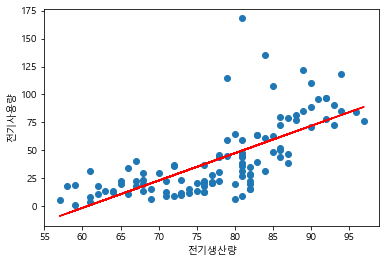

In [22]:
##### 산점도 그리기
plt.scatter(new['Temp'], new['Ozone'])
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')

##### 회귀선 그리기
x1 = np.array(new['Temp'])
y1 = x1 * slope + intercept
plt.plot(x1, y1, c='red')